In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(train_images,train_labels),(test_images,test_lables)= datasets.cifar10.load_data()

In [3]:
train_images, test_image = train_images/255.0, test_images/255.0  #Normalizing the image data into 0-1.

In [4]:
train_images.shape, test_image.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

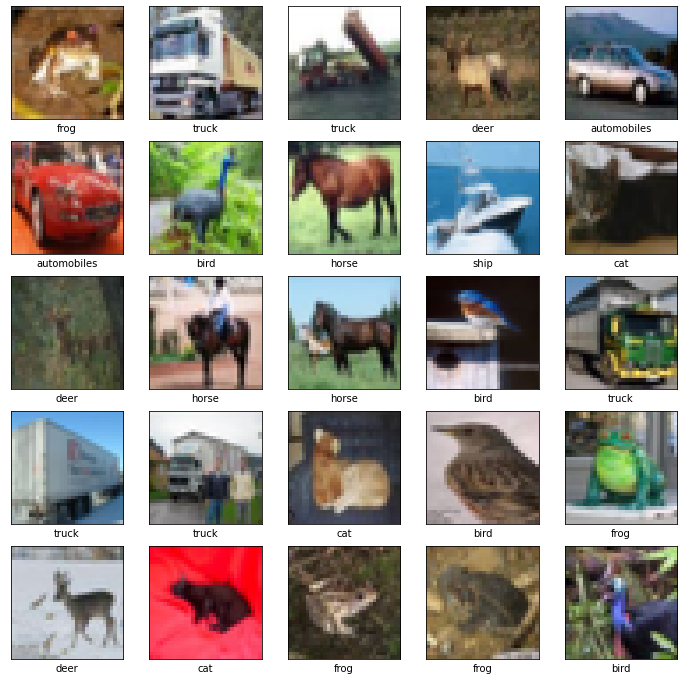

In [6]:
#Verifying the data
class_names= ["airplane", "automobiles", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
plt.figure(figsize=(12,12))
for i in range(25): #first 25 data
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
    
plt.show()

In [7]:
#now lets create a CNN of the data.
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu", input_shape= (32,32,3)))  #32 filters of size 3*3. #And image size=32*32*3.
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu")) #64 filters each of size 3*3 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [9]:
#Flattening Layer 
model.add(layers.Flatten())
model.add(layers.Dense(units=64,activation="relu")) #ANN layer which has 64 neurons.
model.add(layers.Dense(10))  #our output layer is of 10 classes.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=-0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None)

In [12]:
#Compile and train the model.
model.compile(optimizer="adam", loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ["accuracy"])
#when we have multiple classes we use SparseCategoricalCrosseentropy for loss.
history= model.fit(train_images, train_labels, epochs=100, validation_data= (test_images, test_lables), callbacks= early_stopping)


Epoch 1/100


1563/1563 [==============================] - 16s 10ms/step - loss: 1.5210 - accuracy: 0.4430 - val_loss: 283.7139 - val_accuracy: 0.3725
Epoch 2/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1545 - accuracy: 0.5913 - val_loss: 174.7682 - val_accuracy: 0.4610
Epoch 3/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0129 - accuracy: 0.6464 - val_loss: 207.9635 - val_accuracy: 0.4344
Epoch 4/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9227 - accuracy: 0.6755 - val_loss: 243.3893 - val_accuracy: 0.4256
Epoch 5/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8578 - accuracy: 0.7006 - val_loss: 253.2318 - val_accuracy: 0.4143
Epoch 6/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8064 - accuracy: 0.7197 - val_loss: 195.6501 - val_accuracy: 0.4860
Epoch 7/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7633 - accuracy: 0.733

In [14]:
print(test_accuracy)

0.46320000290870667
